# TO RUN
1. Make sure you installed all the dependencies
2. open **'init_notebook.py'** and change the **projectFolder** to the src folder of the repository.
3. In the following cell change the dataDir to the data directory of the InD dataset

In [1]:
# dataDir = "E:/AV/DataSetExploration/drone-dataset-tools/data/location-2/home"
dataDir = "D:/AV/DataSetExploration/drone-dataset-tools/data/location-2/lab"

In [3]:
exec(open('init_notebook.py').read())

current working dirD:\AV\DataSetExploration\TTI-dataset-tools\src


In [4]:
%load_ext autoreload
%autoreload 2

In [31]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

from tti_dataset_tools.TrajectoryTransformer import TrajectoryTransformer
from tti_dataset_tools.TrajectoryVisualizer import TrajectoryVisualizer
from tti_dataset_tools.TrajectoryCleaner import TrajectoryCleaner
from tti_dataset_tools.ColMapper import ColMapper

visualizer = TrajectoryVisualizer()
colMapper = ColMapper(
        idCol='uniqueTrackId', 
        xCol='sceneX', 
        yCol='sceneY',
        xVelCol='sceneXVelocity', 
        yVelCol='sceneYVelocity', 
        speedCol='speed'
    )
transformer = TrajectoryTransformer(colMapper)
cleaner = TrajectoryCleaner(
    colMapper = colMapper,
    minSpeed = 0.0, # we can consider them as obstacles
    maxSpeed = 3.5,
    minYDisplacement = 3.0,
    maxXDisplacement = 8.0,
)

In [7]:
pedDf = pd.read_csv(os.path.join(dataDir, "2022-12-16-fps-5-scene-21-pedestrians.csv"))
otherDf = pd.read_csv(os.path.join(dataDir, "2022-12-16-fps-5-scene-21-others.csv"))

In [8]:
pedDf.head()

,recordingId,frame,uniqueTrackId,sceneId,roadWidth,sceneX,sceneY,sceneXVelocity,sceneYVelocity,sceneXAcceleration,sceneYAcceleration
0,18,22479,18339,21,9.0,7.358047,4.228159,0.046639,1.583174,-0.087637,-0.108809
1,18,22484,18339,21,9.0,7.346523,3.920154,0.057621,1.540026,-0.054910,0.215743
2,18,22489,18339,21,9.0,7.344012,3.604581,0.012554,1.577863,0.225332,-0.189189
3,18,22494,18339,21,9.0,7.357250,3.276597,-0.066190,1.639922,0.393723,-0.310295
4,18,22499,18339,21,9.0,7.382947,2.944717,-0.128485,1.659398,0.311475,-0.097376


In [10]:
print(pedDf["uniqueTrackId"].unique())

[18339 18356 18365 19072 19081 19094 19343 20283 20287 20325 20377 21112
 21306 21358 21359 22016 22066 22101 22226 22250 22313 22540 23237 23395
 23423 23437 24211 24253 25288 25300 25445 25472 26085 26161 26223 26231
 26285 26451 26475 27258 27374 27530 27552 28123 28206 28242 28469 29104
 29207 29303 29580 29587]


In [32]:
transformer.deriveSpeed(pedDf)
transformer.deriveDisplacements(pedDf)
pedDf.describe()

,recordingId,frame,uniqueTrackId,sceneId,roadWidth,sceneX,sceneY,sceneXVelocity,sceneYVelocity,sceneXAcceleration,sceneYAcceleration,speed,displacementX,displacementY
count,1533.000000,1533.000000,1533.000000,1533.0,1533.0,1533.000000,1533.000000,1533.000000,1533.000000,1533.000000,1533.000000,1533.000000,1533.000000,1533.000000
mean,23.877365,16685.883888,24173.146771,21.0,9.0,1.580027,0.510937,0.107800,0.145645,0.001902,-0.011187,1.246607,5.785267,3.732995
std,3.249116,8364.563415,3289.960751,0.0,0.0,5.651128,2.641716,0.668280,1.113970,0.332057,0.304615,0.406617,5.643704,2.619365
min,18.000000,570.000000,18339.000000,21.0,9.0,-7.429797,-4.761115,-1.504651,-2.012759,-1.401522,-1.145172,0.012191,0.000000,0.000000
25%,21.000000,11395.000000,21359.000000,21.0,9.0,-4.016548,-1.769486,-0.150418,-1.021522,-0.189736,-0.169724,1.149447,0.278409,1.456353
50%,25.000000,16759.000000,25288.000000,21.0,9.0,3.355962,0.933808,0.066523,0.169376,0.003710,-0.003260,1.320196,4.002084,3.294352
75%,26.000000,23520.000000,26475.000000,21.0,9.0,7.079638,2.771806,0.523248,1.212514,0.189444,0.154757,1.490442,11.374595,5.997646
max,29.000000,31662.000000,29587.000000,21.0,9.0,7.482312,4.734512,1.820241,1.845924,2.001175,1.465928,2.160536,14.787844,8.989274


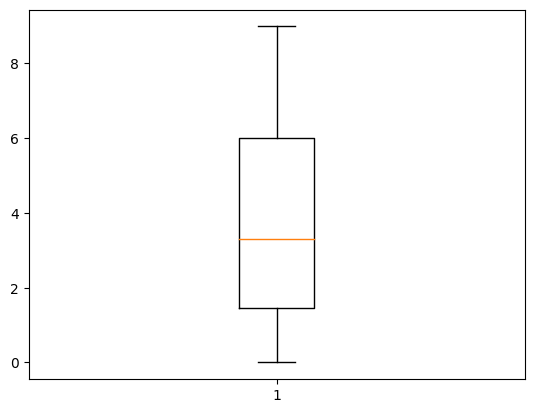

{'whiskers': [<matplotlib.lines.Line2D at 0x2786ee90e50>,
 'caps': [<matplotlib.lines.Line2D at 0x2786f1933d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2786ee90bb0>],
 'medians': [<matplotlib.lines.Line2D at 0x2786f193910>],
 'fliers': [<matplotlib.lines.Line2D at 0x2786f193bb0>],
 'means': []}

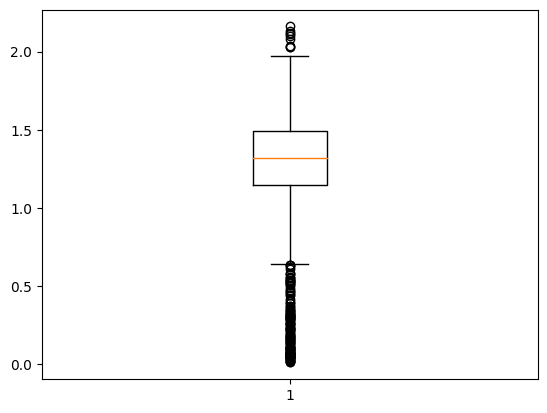

In [33]:
plt.boxplot(pedDf['displacementY'])
plt.show()
plt.boxplot(pedDf['speed'])

In [18]:
outliers = cleaner.getOutliersBySpeed(pedDf, byIQR=True, returnVals=True)
outliers.index

IQR value for column speed is: 0.28307152293764704
using range (1.0191642690701441, 2.151450360820732)


Int64Index([25300], dtype='int64', name='uniqueTrackId')

In [19]:
outliers = cleaner.getOutliersBySpeed(pedDf, byIQR=False, returnVals=True)
outliers

using range (0.0, 3.5)


,speed
uniqueTrackId,


In [34]:
outliers = cleaner.getOutliersByYDisplacement(pedDf, byIQR=False, returnVals=True)
outliers

using min Y displacement (3.0)


,displacementY
uniqueTrackId,
18339,0.000000
18365,0.027969
19072,0.019005
19094,0.075117
19343,0.007388
20283,1.659937
20325,0.024928
21112,0.112884
21306,0.031044


In [35]:
print(len(outliers), 'vs', len(pedDf["uniqueTrackId"].unique()))

41 vs 52


In [24]:
outliers = cleaner.getOutliersByXDisplacement(pedDf, byIQR=False, returnVals=True)
outliers

using max X displacement (8.0)


,displacementX
uniqueTrackId,
18365,14.365384
19072,14.460843
19081,14.640528
19343,14.371639
20283,14.443674
20287,12.941892
20325,14.736175
21358,14.714200
21359,14.576764


IQR value for column speed is: 0.28307152293764704
using range (1.0191642690701441, 2.151450360820732)
using range (0.0, 3.5)


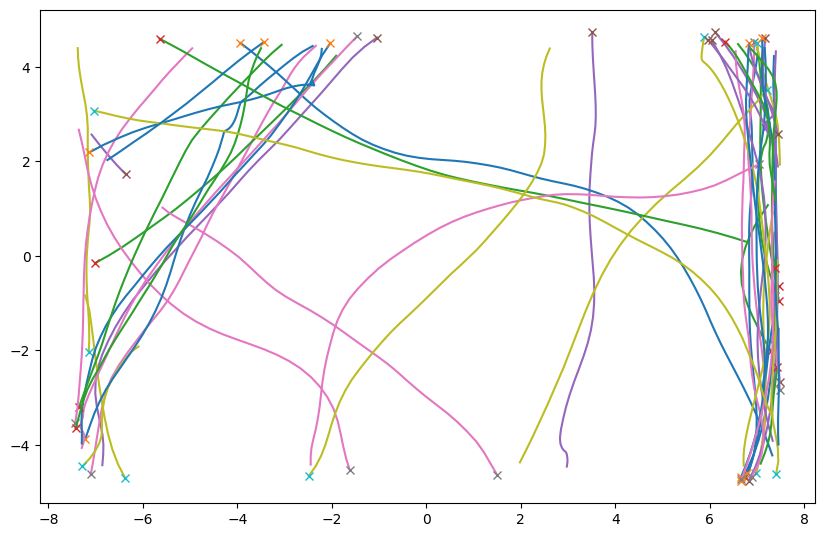

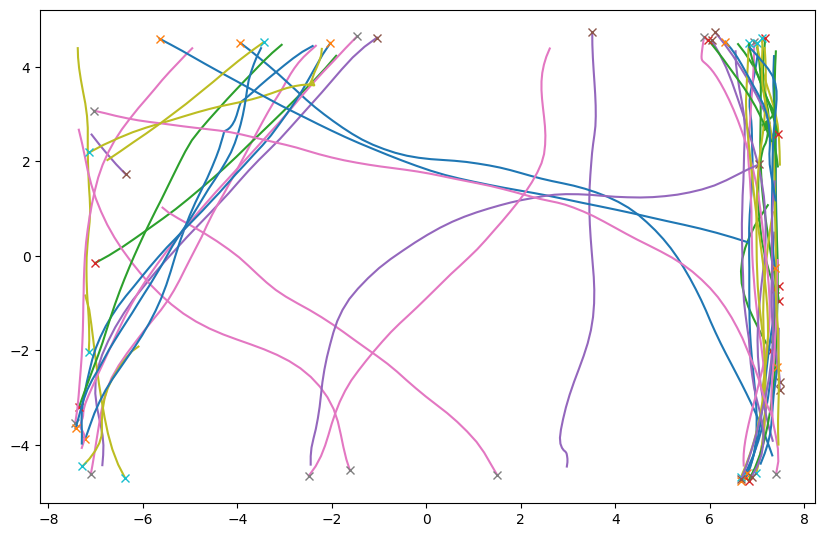

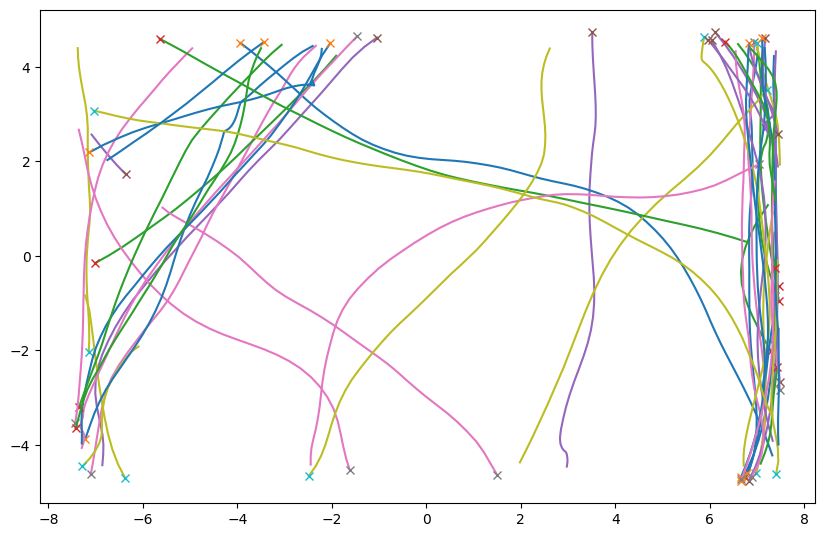

In [25]:
cleanPedDf = cleaner.cleanBySpeed(pedDf, byIQR=True)
cleanPedDf2 = cleaner.cleanBySpeed(pedDf, byIQR=False)
visualizer.show(pedDf, idCol = 'uniqueTrackId', xCol = 'sceneX', yCol = 'sceneY')
visualizer.show(cleanPedDf, idCol = 'uniqueTrackId', xCol = 'sceneX', yCol = 'sceneY')
visualizer.show(cleanPedDf2, idCol = 'uniqueTrackId', xCol = 'sceneX', yCol = 'sceneY')

using min Y displacement (3.0)


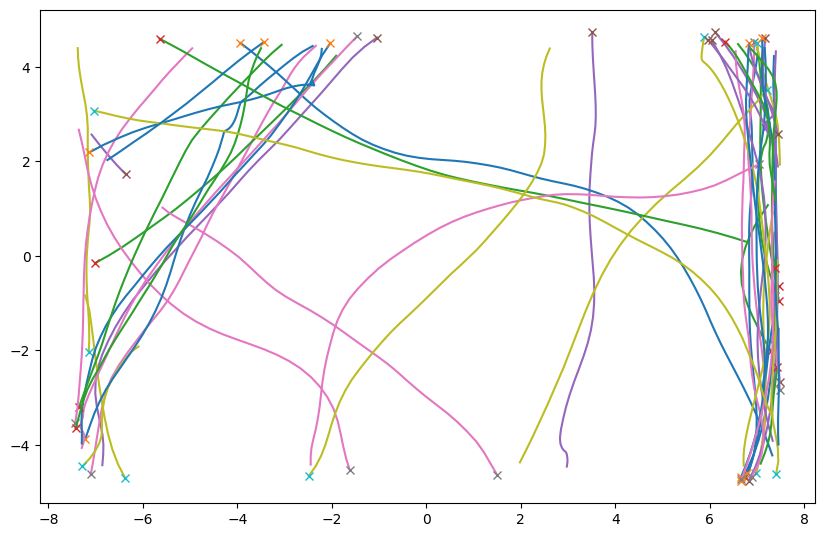

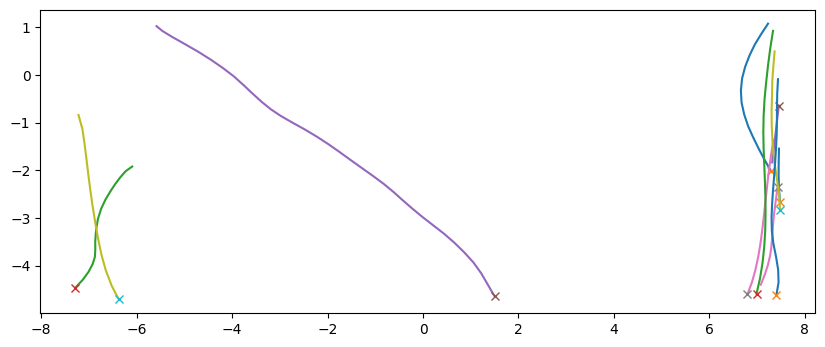

In [36]:
cleanPedDf2 = cleaner.cleanByYDisplacement(pedDf, byIQR=False)
visualizer.show(pedDf, idCol = 'uniqueTrackId', xCol = 'sceneX', yCol = 'sceneY')
visualizer.show(cleanPedDf2, idCol = 'uniqueTrackId', xCol = 'sceneX', yCol = 'sceneY')

In [ ]:
X, Y = transformer.translateOneToLocalSource(df18074, "sceneX", "sceneY")
print(list(zip(X, Y)))

In [ ]:
trackDf["localX"]
trackDf["localY"]